In [2]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("new_train.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 18 columns):
Homepage              10466 non-null float64
Homepage _Duration    10466 non-null float64
Aboutus               10466 non-null float64
Aboutus_Duration      10466 non-null float64
Contactus             10466 non-null float64
Contactus_Duration    10466 non-null float64
BounceRates           10466 non-null float64
ExitRates             10466 non-null float64
PageValues            10480 non-null float64
SpecialDay            10480 non-null float64
Month                 10480 non-null int64
OperatingSystems      10480 non-null int64
Browser               10480 non-null int64
Province              10480 non-null int64
TrafficType           10480 non-null int64
VisitorType           10480 non-null int64
Weekend               10480 non-null int64
Revenue               10480 non-null int64
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [4]:
properties = list(df.columns.values)
a=['PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType', 'Weekend']

X = df[a]
y = df['Revenue']
y.shape

(10480,)

In [5]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (x_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(64, activation="relu")) # Hidden Layer 2
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu")) # Hidden Layer 3
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu")) # Hidden Layer 4
model.add(Dropout(0.2))


model.add(Dense(1, activation="sigmoid")) # Outout Layer

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_______________________

In [8]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history=model.fit(x_train, y_train,validation_split=0.33, batch_size = 64, epochs = 100)

Train on 5617 samples, validate on 2767 samples
Epoch 1/100
5617/5617 [==============================] - 1s 109us/step - loss: 0.3973 - acc: 0.8588 - val_loss: 0.2842 - val_acc: 0.8887
Epoch 2/100
5617/5617 [==============================] - 0s 26us/step - loss: 0.3027 - acc: 0.8777 - val_loss: 0.2759 - val_acc: 0.8880
Epoch 3/100
5617/5617 [==============================] - 0s 24us/step - loss: 0.2800 - acc: 0.8786 - val_loss: 0.2715 - val_acc: 0.8934
Epoch 4/100
5617/5617 [==============================] - 0s 21us/step - loss: 0.2753 - acc: 0.8811 - val_loss: 0.2729 - val_acc: 0.8815
Epoch 5/100
5617/5617 [==============================] - 0s 21us/step - loss: 0.2753 - acc: 0.8798 - val_loss: 0.2787 - val_acc: 0.8844
Epoch 6/100
5617/5617 [==============================] - 0s 21us/step - loss: 0.2673 - acc: 0.8816 - val_loss: 0.2635 - val_acc: 0.8916
Epoch 7/100
5617/5617 [==============================] - 0s 21us/step - loss: 0.2695 - acc: 0.8813 - val_loss: 0.2719 - val_acc: 0.8909

In [10]:
test_loss, test_acc = model.evaluate(x_validation, y_validation)

2096/2096 [==============================] - 0s 13us/step


In [11]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8897900763358778


In [12]:
print('Test lost:', test_loss)

Test lost: 0.32053031425439676


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


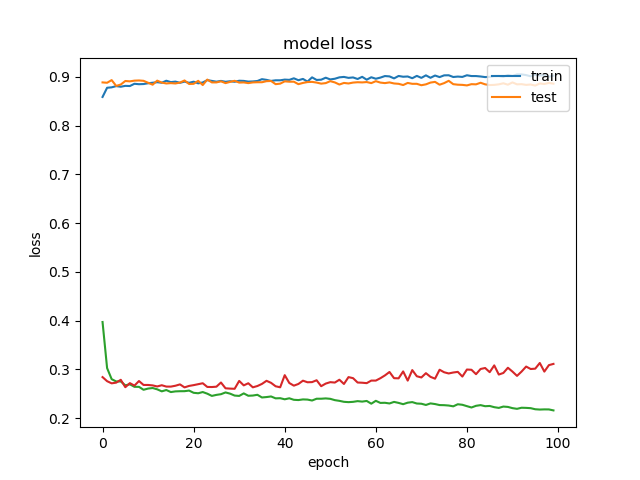

In [16]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()